In [3]:
import librosa
import pandas as pd
import numpy as np

In [56]:
df_1 = pd.read_csv('./output_음성 004_sd.m4a.csv',encoding = 'euc-kr')
df_2 = pd.read_csv('./output_음성 005_sd.m4a.csv',encoding = 'euc-kr')
del df_1['Unnamed: 0']
del df_2['Unnamed: 0']
df_1.columns = [x for x in range(26)]
df_2.columns = [x for x in range(26)]



In [57]:
nameadd = pd.DataFrame(['백주엽','백원영'])

In [58]:
import pandas as pd
from sklearn.cluster import DBSCAN


df = pd.read_csv('./data.csv',encoding = 'euc-kr')
df.columns = ['singer']+[x for x in range(len(df.columns)-1)]
name = df['singer']
name = name.append(nameadd)
del df['singer']
df = pd.concat([df,df_1,df_2])

In [59]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scaled_X = scale.transform(df)

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt

k = 7
# create model and prediction
model = KMeans(n_clusters=k,algorithm='auto')
model.fit(scaled_X)
predict = pd.DataFrame(model.predict(scaled_X))
predict.columns=['predict']

print(predict)
count=[]
for i in range(k):
    count.append(sum(predict['predict']==i))

string = 'abcdefg'
    
for i in range(k):
    print('{}번째 군집은 {}개'.format(i+1,count[i]))
    predict['predict'] = predict['predict'].replace(i,string[i])

    predict
0         1
1         2
2         5
3         2
4         2
..      ...
72        4
73        3
74        6
75        4
76        0

[77 rows x 1 columns]
1번째 군집은 9개
2번째 군집은 11개
3번째 군집은 15개
4번째 군집은 9개
5번째 군집은 13개
6번째 군집은 11개
7번째 군집은 9개


         pc1       pc2  singer cluster
0    4.88706 -0.188658    10cm       b
1    2.14357  -1.92238    Buzz       c
2    1.23371  -1.69754  CHEEZE       f
3   -2.01138  0.428449   Crush       c
4    1.17855 -0.722152  K.Will       c
..       ...       ...     ...     ...
72  -1.68938 -0.589545     황인욱       e
73  0.591314   4.45778      휘성       d
74   3.09899  -2.89184      휘인       g
75  -3.32475   -2.0077     백주엽       e
76  -4.91919  0.321016     백원영       a

[77 rows x 4 columns]


,pc1,pc2,singer,cluster
9,-4.53081,0.315212,김동률,e
10,-2.52246,-2.48581,김범수,e
15,-3.22102,-1.2773,김태우,e
18,-2.18118,-0.0671996,더 원,e
26,-2.14911,-3.33577,박효신,e
34,-1.7647,-0.435024,성시경,e
42,-0.325771,0.118733,알리,e
54,-2.68614,-2.54483,임재현,e
63,-0.540317,-1.67231,진민호,e
66,-2.18463,0.0405853,태연,e


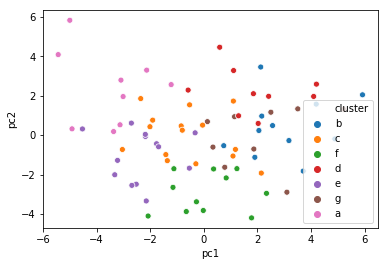

In [67]:
from sklearn.preprocessing import StandardScaler
import numpy as np


#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(scaled_X)
new = np.c_[pc,name, predict]
df  = pd.DataFrame(new,columns=['pc1','pc2','singer','cluster'])
print(df)

#polting
import seaborn as sns
sns.scatterplot(x='pc1',y='pc2',hue = 'cluster',data =df)
plt.savefig('fig3.png', dpi=300)
df[df['cluster']=='e']

